In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Target Image')

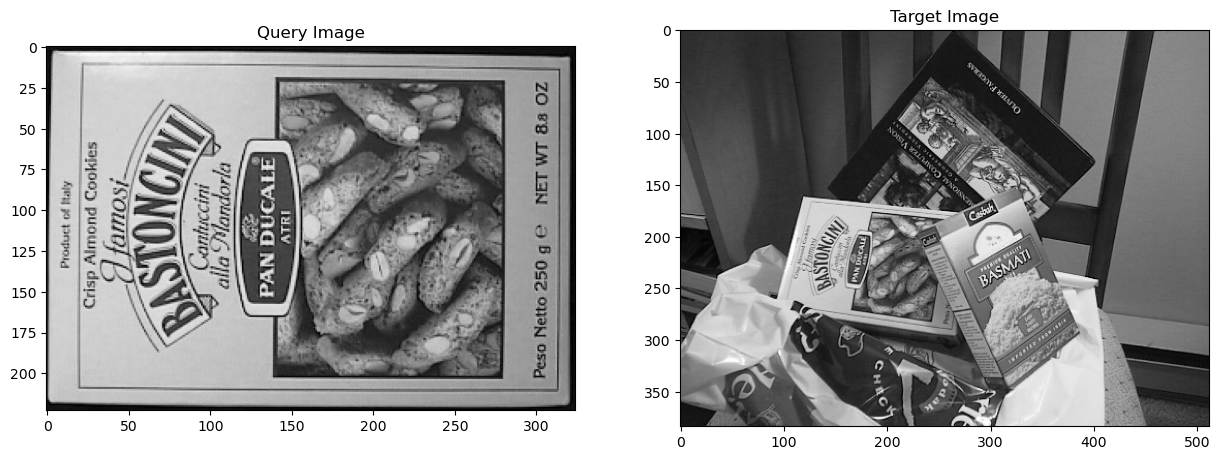

In [2]:
# let's import our two images for this part of the lab
# img_q will be the query image that we would like to recognize/detect/match in the target image

img_q = cv2.imread("box.png",cv2.IMREAD_GRAYSCALE)
img_t = cv2.imread("box_in_scene.png",cv2.IMREAD_GRAYSCALE)

#ok so let's check them! 

fig = plt.figure(figsize=(15, 12), dpi=100)
ax = fig.add_subplot(1, 2, 1)
plt.imshow(img_q,cmap="gray")
ax.set_title('Query Image')
ax = fig.add_subplot(1,2,2)
plt.imshow(img_t,cmap="gray")
ax.set_title("Target Image")


SIFT found 604 keypoints in the query image and 969 keypoints in the target image


Text(0.5, 1.0, 'Keypoints in Target Image')

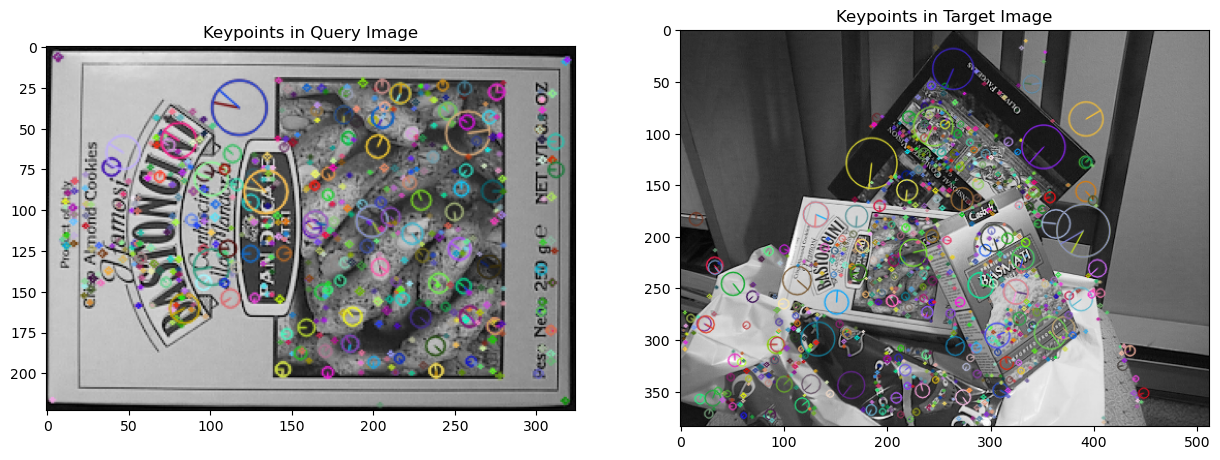

In [3]:
# we create an instance for our detector

sift = cv2.SIFT_create()

kp_q = sift.detect(img_q,None)
kp_t = sift.detect(img_t,None)

print("SIFT found {} keypoints in the query image and {} keypoints in the target image".format(len(kp_q),len(kp_t)))

# we can draw our keypoints in the images too
img_kpq = img_q.copy()
img_kpt = img_t.copy()
img_kpq = cv2.drawKeypoints(img_q,kp_q,img_kpq, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img_kpt = cv2.drawKeypoints(img_t,kp_t,img_kpt, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

fig = plt.figure(figsize=(15, 12), dpi=100)
ax = fig.add_subplot(1, 2, 1)
plt.imshow(img_kpq,cmap="gray")
ax.set_title('Keypoints in Query Image')
ax = fig.add_subplot(1,2,2)
plt.imshow(img_kpt,cmap="gray")
ax.set_title("Keypoints in Target Image")

In [4]:
# since we extracted the keypoints before, we can extract the features by calling "compute" in our sift handler
kp_q, desc_q = sift.compute(img_q,kp_q)
kp_t, desc_t = sift.compute(img_t,kp_t)

# now we have on one variable our keypoints, and their corresponding descriptor in the other.
# we can check that their sizes match and correspond to the same number of keypoints from before

print("number of keypoints in query image is {}, number of feature vectors {}, the size of each feature vector is {}".format(len(kp_q),len(desc_q),len(desc_q[0])))
print("number of keypoints in target image is {}, number of feature vectors {}, the size of each feature vector is {}".format(len(kp_t),len(desc_t),len(desc_t[0])))

# we can also take a look at how this feature vectors look like

print(desc_q[0])

number of keypoints in query image is 604, number of feature vectors 604, the size of each feature vector is 128
number of keypoints in target image is 969, number of feature vectors 969, the size of each feature vector is 128
[  0.   0.   0.   0.   0.   0.   0.   0.   2.   0.   0.   0.   0.   0.
   1.  11.   1.   0.   0.   0.   0.   0.  27.  19.   0.   0.   0.   0.
   0.   0.  57.  11.  15.   0.   0.   0.   0.   0.   0.   8. 154.   2.
   0.   0.   0.   0.  18. 164.  33.   1.   0.   0.   0.   0. 164. 164.
   0.   0.   1.   0.   0.   0. 164.  56.  38.   4.   0.   0.   0.   0.
   0.   2. 164.  64.   0.   0.   0.   0.   1.  55. 154.  35.   2.   0.
   0.   0.  17.  43.   1.   6.   6.   0.   0.   0.  13.   4.  18.   2.
   0.   0.   0.   0.   0.   1. 164.  63.   0.   0.   0.   0.   0.   0.
 164.  37.   0.   0.   0.   0.   0.   0.   5.   4.   1.   0.   0.   0.
   0.   0.]


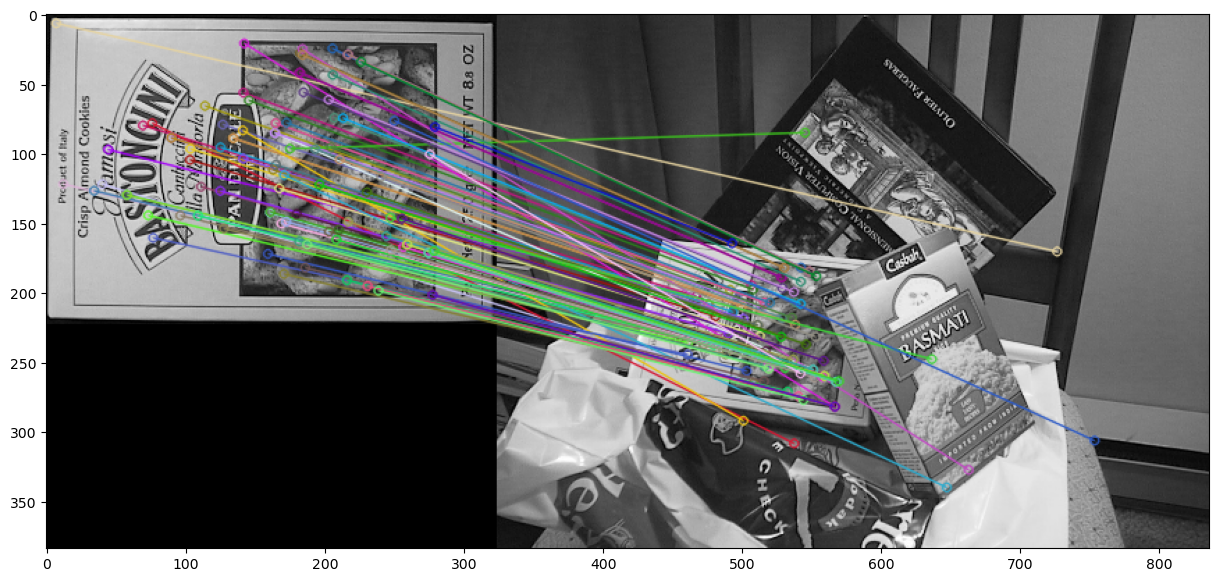

In [5]:
# we initialize our handler for the matcher algorithm
BFM = cv2.BFMatcher()

# we find the matches between our two descriptors and extract the 2 best matches for Lowe's ratio test
matches = BFM.knnMatch(desc_q,desc_t,k=2)

valid_matches = []

for ImageA,ImageB in matches:
    if ImageA.distance < 0.8*ImageB.distance:
        valid_matches.append(ImageA)

# we can finally draw our keypoint matches between our query and target image!
img_match = cv2.drawMatches(img_q,kp_q,img_t,kp_t,valid_matches,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

fig = plt.figure(figsize=(15, 12), dpi=100)
plt.imshow(img_match)

In [6]:
dicaprio1 = cv2.imread("dicaprio1.jpg",cv2.IMREAD_GRAYSCALE)
dicaprio2 = cv2.imread("dicaprio2.jpg",cv2.IMREAD_GRAYSCALE)
brad = cv2.imread("brad.jpg",cv2.IMREAD_GRAYSCALE)


In [7]:
kp_d1, desc_d1 = sift.detectAndCompute(dicaprio1,None)
kp_d2, desc_d2 = sift.detectAndCompute(dicaprio2,None)
kp_b, desc_b = sift.detectAndCompute(brad,None)

20


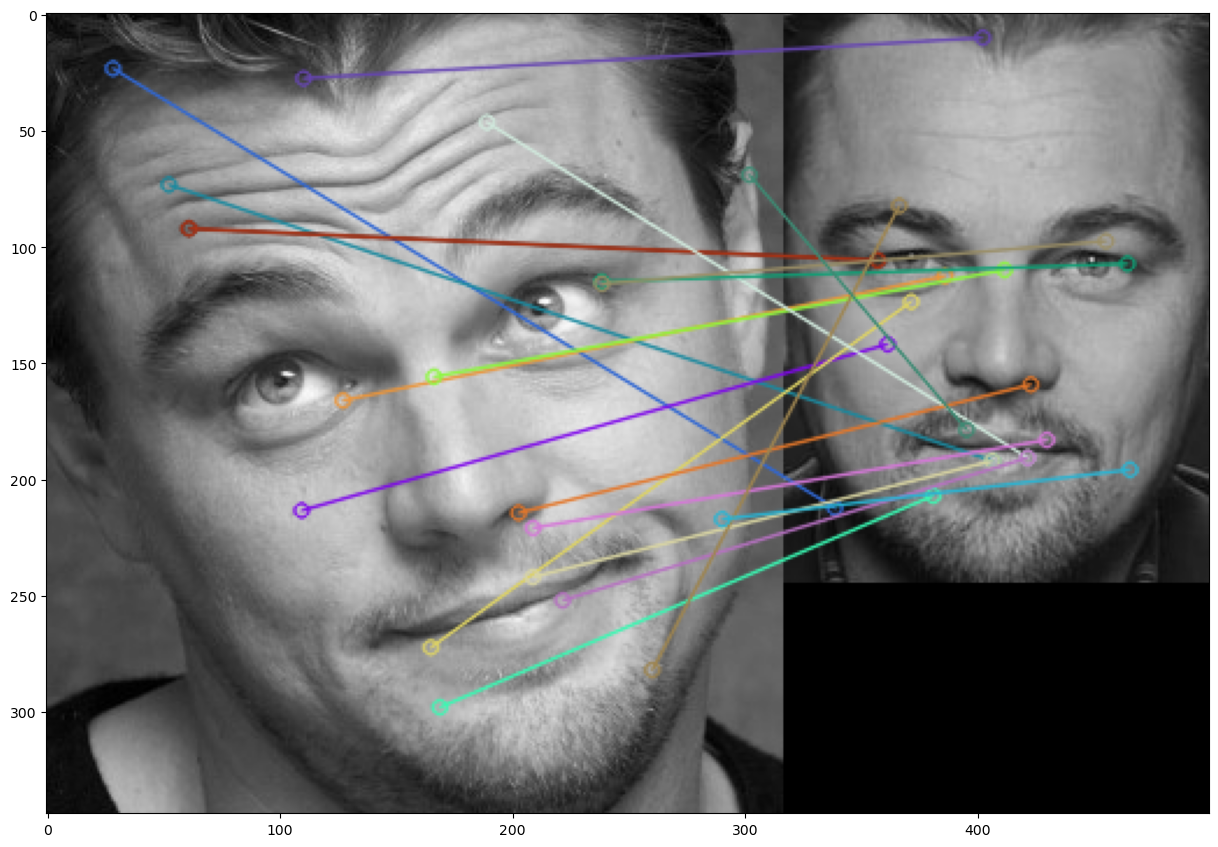

In [8]:
# we find the matches between our two descriptors and extract the 2 best matches for Lowe's ratio test
matches = BFM.knnMatch(desc_d2,desc_d1,k=2)

dicaprio_matches = []

for ImageA,ImageB in matches:
    if ImageA.distance < 0.8*ImageB.distance:
        dicaprio_matches.append(ImageA)
        
print(len(dicaprio_matches))

# we can finally draw our keypoint matches between our query and target image!
dicaprio_match = cv2.drawMatches(dicaprio2,kp_d2,dicaprio1,kp_d1,dicaprio_matches,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

fig = plt.figure(figsize=(15, 12), dpi=100)
plt.imshow(dicaprio_match)

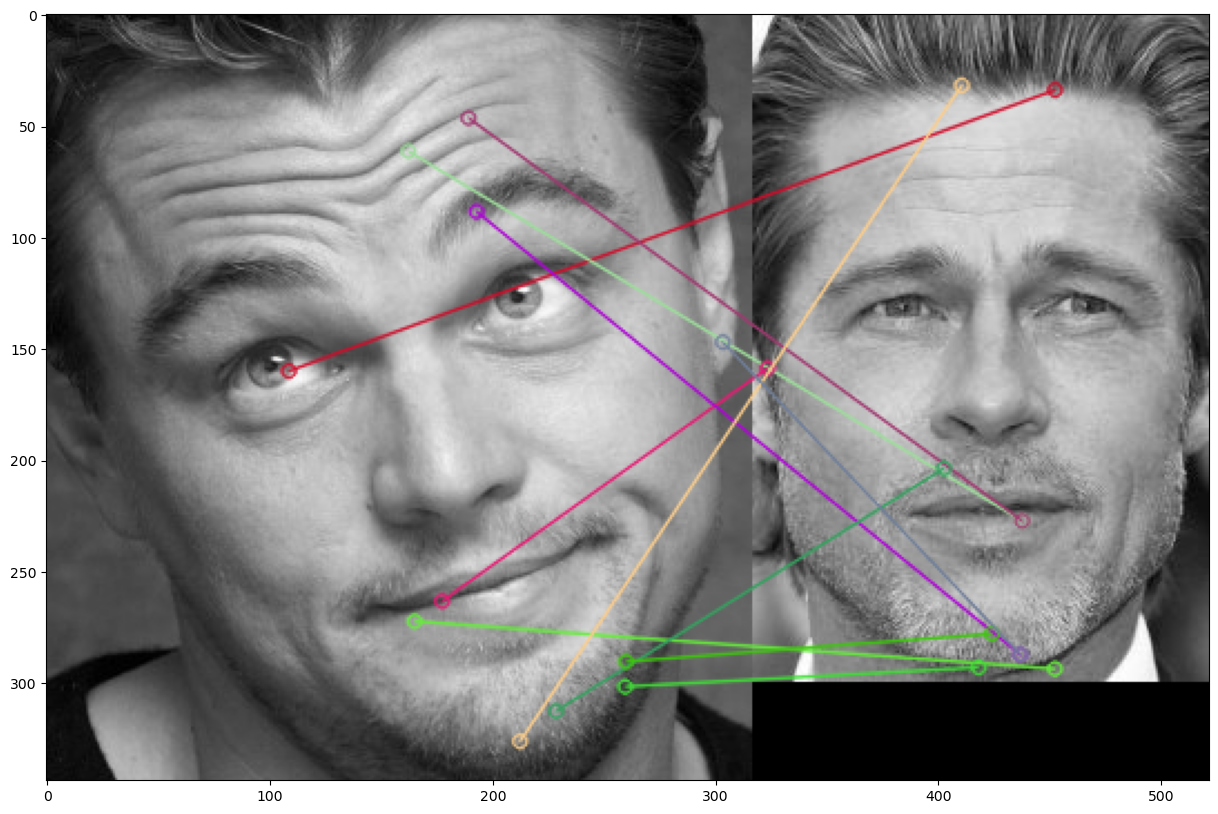

In [9]:
# we find the matches between our two descriptors and extract the 2 best matches for Lowe's ratio test
matches = BFM.knnMatch(desc_d2,desc_b,k=2)

brad_matches = []

for ImageA,ImageB in matches:
    if ImageA.distance < 0.8*ImageB.distance:
        brad_matches.append(ImageA)

# we can finally draw our keypoint matches between our query and target image!
brad_match = cv2.drawMatches(dicaprio2,kp_d2,brad,kp_b,brad_matches,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

fig = plt.figure(figsize=(15, 12), dpi=100)
plt.imshow(brad_match)

### Finding keypoints and descriptors


In [10]:
sift = cv2.SIFT_create()


# print the number of keypoints in dicaprio1

kp_d1 = sift.detect(dicaprio1,None)

# print the number of keypoints in dicaprio2
kp_d2 = sift.detect(dicaprio2,None)

# print the number of keypoints in brad
kp_b = sift.detect(brad,None)


print("SIFT found {} keypoints in dicaprio1, {} keypoints in dicaprio2 and {} keypoints in brad".format(len(kp_d1),len(kp_d2),len(kp_b)))



SIFT found 149 keypoints in dicaprio1, 251 keypoints in dicaprio2 and 275 keypoints in brad


###  Compare Detect() and Compute() to detectAndCompute()



In [11]:
kp_d1, desc_d1 = sift.compute(dicaprio1,kp_d1)
kp_d2, desc_d2 = sift.compute(dicaprio2,kp_d2)
kp_b, desc_b = sift.compute(brad,kp_b)
print(len(kp_d1))

# take a look to OpenCV's detectAndCompute function and check that the descriptors obtained are exactly the same than when using the functions detect() and compute(). Check this for dicaprio1, dicaprio2 and brad images.

kp_d1_new, desc_d1_new = sift.detectAndCompute(dicaprio1, None)
kp_d2_new, desc_d2_new = sift.detectAndCompute(dicaprio2, None)
kp_b_new, desc_b_new = sift.detectAndCompute(brad, None)

print("detect() and compute() Dicaprio 1",desc_d1)
print("detectAndCompute Dicaprio 1",desc_d1_new)

print("detect() and compute() Dicaprio 2",desc_d2)
print("detectAndCompute Dicaprio 2",desc_d2_new)

print("detect() and compute() Brad",desc_b)
print("detectAndCompute Brad",desc_b_new)


149
detect() and compute() Dicaprio 1 [[ 18.  10.   0. ...   0.   0.   0.]
 [  0.  17.  48. ...  45.   0.   0.]
 [ 24.   0.   0. ...   2. 129.  89.]
 ...
 [  4.  11.  17. ...   0.   0.   0.]
 [ 17.   1.   0. ...   0.   0.   0.]
 [  3.   9.  33. ...   3.   0.   0.]]
detectAndCompute Dicaprio 1 [[ 18.  10.   0. ...   0.   0.   0.]
 [  0.  17.  48. ...  45.   0.   0.]
 [ 24.   0.   0. ...   2. 129.  89.]
 ...
 [  4.  11.  17. ...   0.   0.   0.]
 [ 17.   1.   0. ...   0.   0.   0.]
 [  3.   9.  33. ...   3.   0.   0.]]
detect() and compute() Dicaprio 2 [[ 26.  26.   6. ...   0.   0.   0.]
 [  0.   2.   0. ...  27. 101.  19.]
 [ 10.  11.  61. ...   0.   0.   0.]
 ...
 [  3.   1.   0. ...  51.   1.   0.]
 [ 18.   1.   0. ...  18.   1.   0.]
 [ 15.   0.   0. ...   2.   1.   7.]]
detectAndCompute Dicaprio 2 [[ 26.  26.   6. ...   0.   0.   0.]
 [  0.   2.   0. ...  27. 101.  19.]
 [ 10.  11.  61. ...   0.   0.   0.]
 ...
 [  3.   1.   0. ...  51.   1.   0.]
 [ 18.   1.   0. ...  18.   1.   0.

**The descriptors seem to be the same for all images**

### Matches Dicaprio1, Dicaprio2

In [12]:
BFM = cv2.BFMatcher()

dicaprios_matches = BFM.knnMatch(desc_d2,desc_d1,k=2)

# print the number of matches between dicaprio vs dicaprio
print("The number of matches between the two photos is {} matches".format(len(dicaprios_matches)))


valid_dicaprio_matches = []

for ImageA,ImageB in dicaprios_matches:
    if ImageA.distance < 0.8*ImageB.distance:
        valid_dicaprio_matches.append(ImageA)  

# print the number of valid matches for dicaprio vs dicaprio
print("The number of valid matches between the two photos is {} matches".format(len(valid_dicaprio_matches)))

ratio_dicaprios = len(valid_dicaprio_matches)/(min(len(kp_d1),len(kp_d2)))

# print the ratio of matches between dicaprios over the MINIMUM number of keypoints detected between both images
print("The ratio of matches between dicaprios over the MINIMUM number of keypoints detected between both images is {}".format(ratio_dicaprios))


The number of matches between the two photos is 251 matches
The number of valid matches between the two photos is 20 matches
The ratio of matches between dicaprios over the MINIMUM number of keypoints detected between both images is 0.1342281879194631


### Number of matches Dicaprio2, Brad

In [13]:
brad_matches = BFM.knnMatch(desc_d2,desc_b,k=2)

# print the number of matches between dicaprio and brad
print("The number of matches between the two photos is {} matches".format(len(brad_matches)))

valid_brad_matches = []



for ImageA,ImageB in brad_matches:
    if ImageA.distance < 0.8*ImageB.distance:
        valid_brad_matches.append(ImageA)

        
# print the number of valid matches between dicaprio and brad  
print("The number of valid matches between the two photos is {} matches".format(len(valid_brad_matches)))

ratio_brad = len(valid_brad_matches)/(min(len(kp_d2),len(kp_b)))
      
# print the ratio of matches between dicaprio and brad over the MINIMUM number of keypoints detected between both images
print("The ratio of matches between dicaprio and brad over the MINIMUM number of keypoints detected between both images is {}".format(ratio_brad))



The number of matches between the two photos is 251 matches
The number of valid matches between the two photos is 11 matches
The ratio of matches between dicaprio and brad over the MINIMUM number of keypoints detected between both images is 0.043824701195219126


## Histogram of Oriented Gradients (HOG)

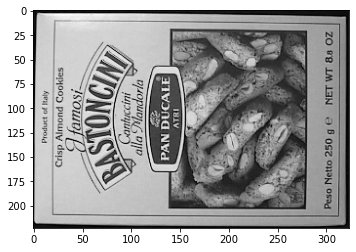

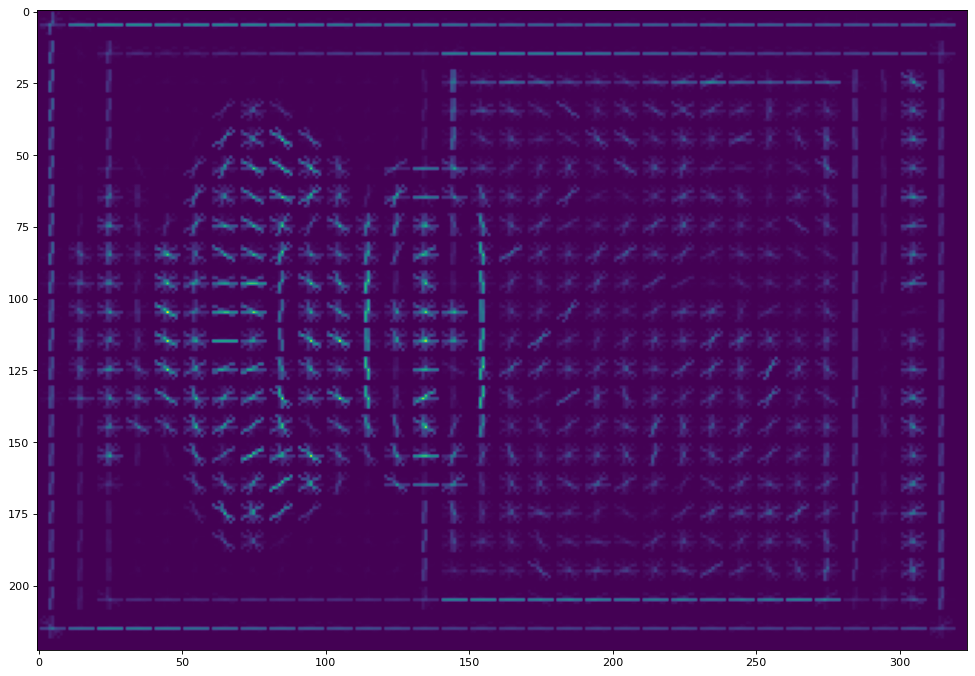

In [14]:
# we will be using the hog descriptor from skimage since it has visualization tools available for this example
from skimage import feature
from skimage import exposure

plt.imshow(img_q,cmap="gray")

# These are the usual main parameters to tune in the HOG algorithm. 
(H,Himage) = feature.hog(img_q, orientations=9, pixels_per_cell=(10,10), cells_per_block=(2,2),visualize=True)

Himage = exposure.rescale_intensity(Himage, out_range=(0,255))
Himage = Himage.astype("uint8")

fig = plt.figure(figsize=(15, 12), dpi=80)
plt.imshow(Himage)


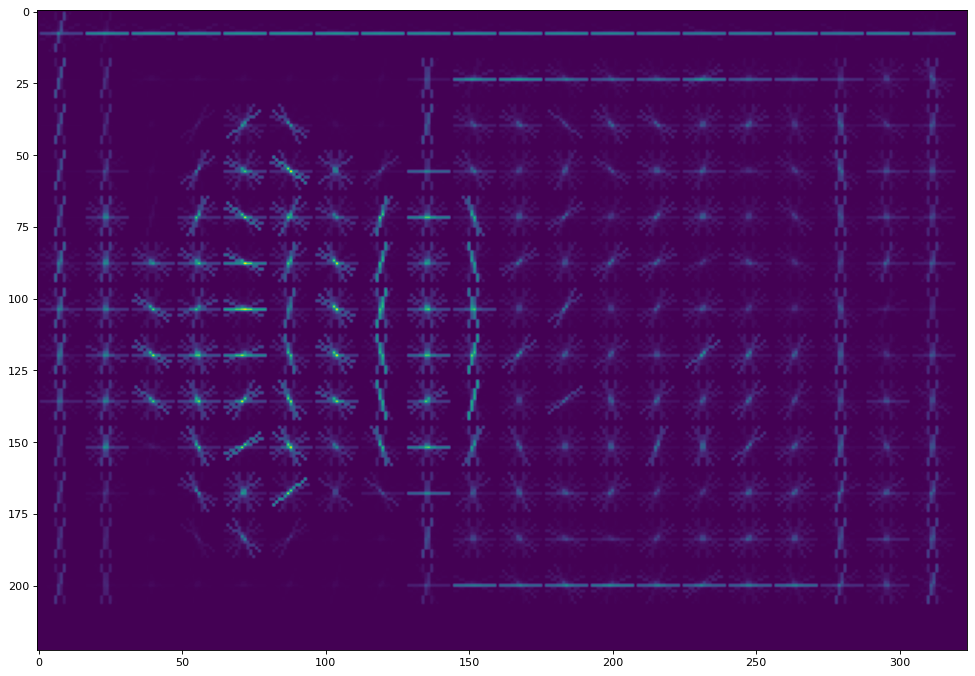

In [15]:
# TO DO:
# Vary these parameters and check in the plot show they affect the representation of the image

# These are the usual main parameters to tune in the HOG algorithm. 
(H,Himage) = feature.hog(img_q, orientations=9, pixels_per_cell=(16, 16), cells_per_block=(2,2),visualize=True)

Himage = exposure.rescale_intensity(Himage, out_range=(0,255))
Himage = Himage.astype("uint8")

fig = plt.figure(figsize=(15, 12), dpi=80)
plt.imshow(Himage)


### Smaller size (in pixels) of a cell seems to give better results. 

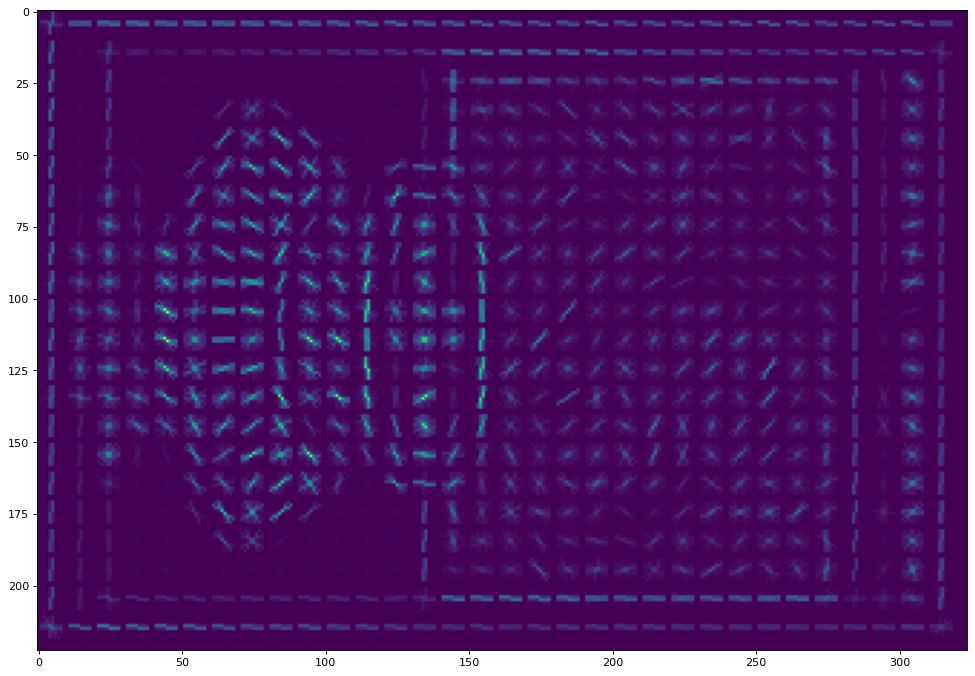

In [16]:
# These are the usual main parameters to tune in the HOG algorithm. 
(H,Himage) = feature.hog(img_q, orientations=120, pixels_per_cell=(10, 10), cells_per_block=(2,2),visualize=True)

Himage = exposure.rescale_intensity(Himage, out_range=(0,255))
Himage = Himage.astype("uint8")

fig = plt.figure(figsize=(15, 12), dpi=80)
plt.imshow(Himage)


### Higher number of orientation bins give much better results in terms of detecting direction of lines, however it takes longer to compute. 

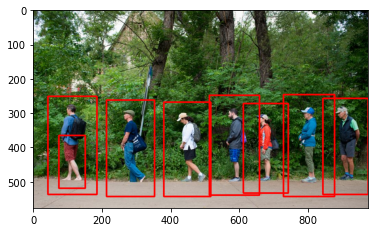

In [17]:
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

people_color = cv2.cvtColor(cv2.imread("people.jpg"),cv2.COLOR_BGR2RGB)
people_gray = cv2.cvtColor(people_color,cv2.COLOR_RGB2GRAY)


bbox, weights = hog.detectMultiScale(people_gray,winStride = (2,2), padding=(10,10),scale=1.02)

# Drawing the regions in the Image
for (x, y, w, h) in bbox:
    cv2.rectangle(people_color, (x, y), 
                  (x + w, y + h), 
                  (255, 0, 0), 4)
    
plt.imshow(people_color)



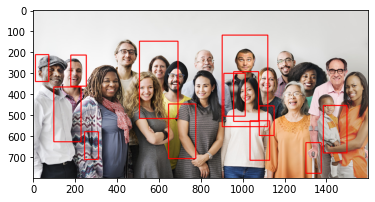

In [18]:
# TO DO:
# import other images with people and analyze how good the detector works

people2_color = cv2.cvtColor(cv2.imread("people1.png"),cv2.COLOR_BGR2RGB)
people2_gray = cv2.cvtColor(people2_color,cv2.COLOR_RGB2GRAY)


bbox, weights = hog.detectMultiScale(people2_gray,winStride = (2,2), padding=(10,10),scale=1.02)

# Drawing the regions in the Image
for (x, y, w, h) in bbox:
    cv2.rectangle(people2_color, (x, y), 
                  (x + w, y + h), 
                  (255, 0, 0), 4)
    
plt.imshow(people2_color)

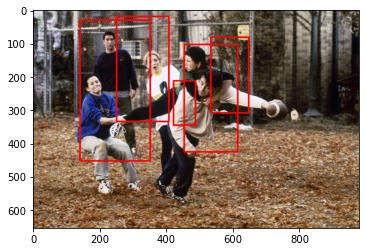

In [19]:
# TO DO:
# import other images with people and analyze how good the detector works

friends1_color = cv2.cvtColor(cv2.imread("friends2.jpeg"),cv2.COLOR_BGR2RGB)
friends1_gray = cv2.cvtColor(friends1_color,cv2.COLOR_RGB2GRAY)


bbox, weights = hog.detectMultiScale(friends1_gray,winStride = (2,2), padding=(10,10),scale=1.02)

# Drawing the regions in the Image
for (x, y, w, h) in bbox:
    cv2.rectangle(friends1_color, (x, y), 
                  (x + w, y + h), 
                  (255, 0, 0), 4)
    
plt.imshow(friends1_color)

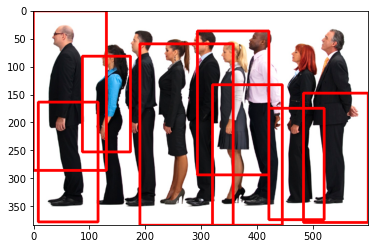

In [20]:
# TO DO:
# import other images with people and analyze how good the detector works

peopleInLine_color = cv2.cvtColor(cv2.imread("people-in-line.png"),cv2.COLOR_BGR2RGB)
peopleInLine_gray = cv2.cvtColor(peopleInLine_color,cv2.COLOR_RGB2GRAY)


bbox, weights = hog.detectMultiScale(peopleInLine_gray,winStride = (2,2), padding=(10,10),scale=1.02)

# Drawing the regions in the Image
for (x, y, w, h) in bbox:
    cv2.rectangle(peopleInLine_color, (x, y), 
                  (x + w, y + h), 
                  (255, 0, 0), 4)
    
plt.imshow(peopleInLine_color)

Text(0.5, 1.0, 'FaceB1')

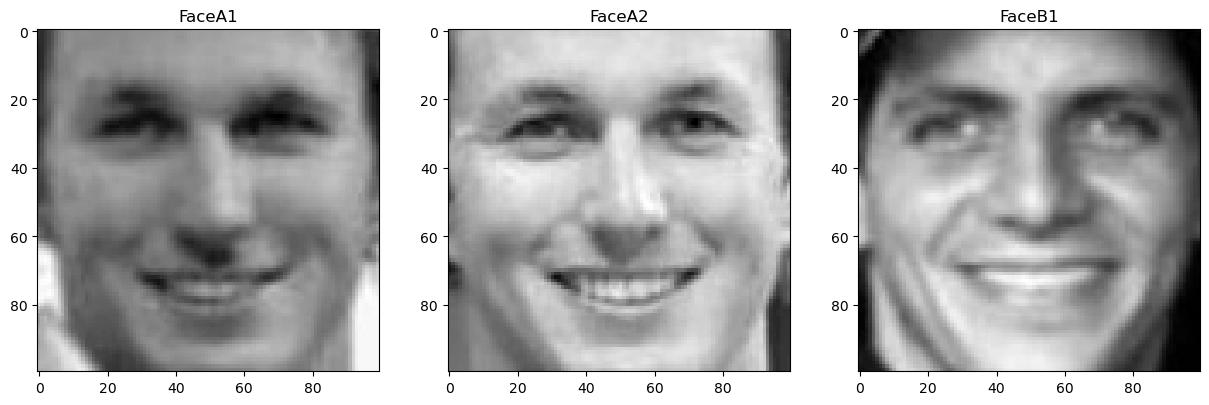

In [21]:
# we import the images
faceA1 = cv2.imread("Lab2-CV-course-HH/faceA1.jpg",cv2.IMREAD_GRAYSCALE)
faceA2 = cv2.imread("Lab2-CV-course-HH/faceA2.jpg",cv2.IMREAD_GRAYSCALE)
faceB1 = cv2.imread("Lab2-CV-course-HH/faceB1.jpg",cv2.IMREAD_GRAYSCALE)

# TO DO:
# Vary the parameters from HOG and check how they affect the size of the feature vectors and the distance between the images
HA1 = feature.hog(faceA1, orientations=2, pixels_per_cell=(2,2), cells_per_block=(20,20))
HA2 = feature.hog(faceA2, orientations=2, pixels_per_cell=(2,2), cells_per_block=(20,20))
HB1 = feature.hog(faceB1, orientations=2, pixels_per_cell=(2,2), cells_per_block=(20,20))

# Let's plot our images:
fig = plt.figure(figsize=(15, 12), dpi=100)
ax = fig.add_subplot(1, 3, 1)
plt.imshow(faceA1,cmap="gray")
ax.set_title('FaceA1')
ax = fig.add_subplot(1,3,2)
plt.imshow(faceA2,cmap="gray")
ax.set_title("FaceA2")
ax = fig.add_subplot(1,3,3)
plt.imshow(faceB1,cmap="gray")
ax.set_title("FaceB1")

In [22]:
print("images shape: {}".format(faceA1.shape))
print("feature vector size: {}".format(len(HA1)))

distA_I = np.sqrt(np.sum((faceA1-faceA2)**2))
distB_I = np.sqrt(np.sum((faceA1-faceB1)**2))
print("pixel-wise distance between same person: {} ".format(distA_I))
print("pixel-wise distance between different persons: {} ".format(distB_I))

distA = np.sqrt(np.sum((HA1 - HA2)**2))
distB = np.sqrt(np.sum((HA1 - HB1)**2))
print("distance between feature vectors from the same person: {}".format(distA))
print("distance between feature vectors from different persons: {}".format(distB))

print("The distance between different persons is {} times the distance between same person for direct pixel comparison".format(distB_I/distA_I))
print("The distance between different persons is {} times the distance between same person for HOG".format(distB/distA))

images shape: (100, 100)
feature vector size: 768800
pixel-wise distance between same person: 1065.824563424957 
pixel-wise distance between different persons: 1031.6016673115646 
distance between feature vectors from the same person: 22.720692985229167
distance between feature vectors from different persons: 30.25852597582159
The distance between different persons is 0.9678906854957261 times the distance between same person for direct pixel comparison
The distance between different persons is 1.3317606991781812 times the distance between same person for HOG


### Local Binary Patterns (LBP)

Text(0.5, 1.0, 'Texture image')

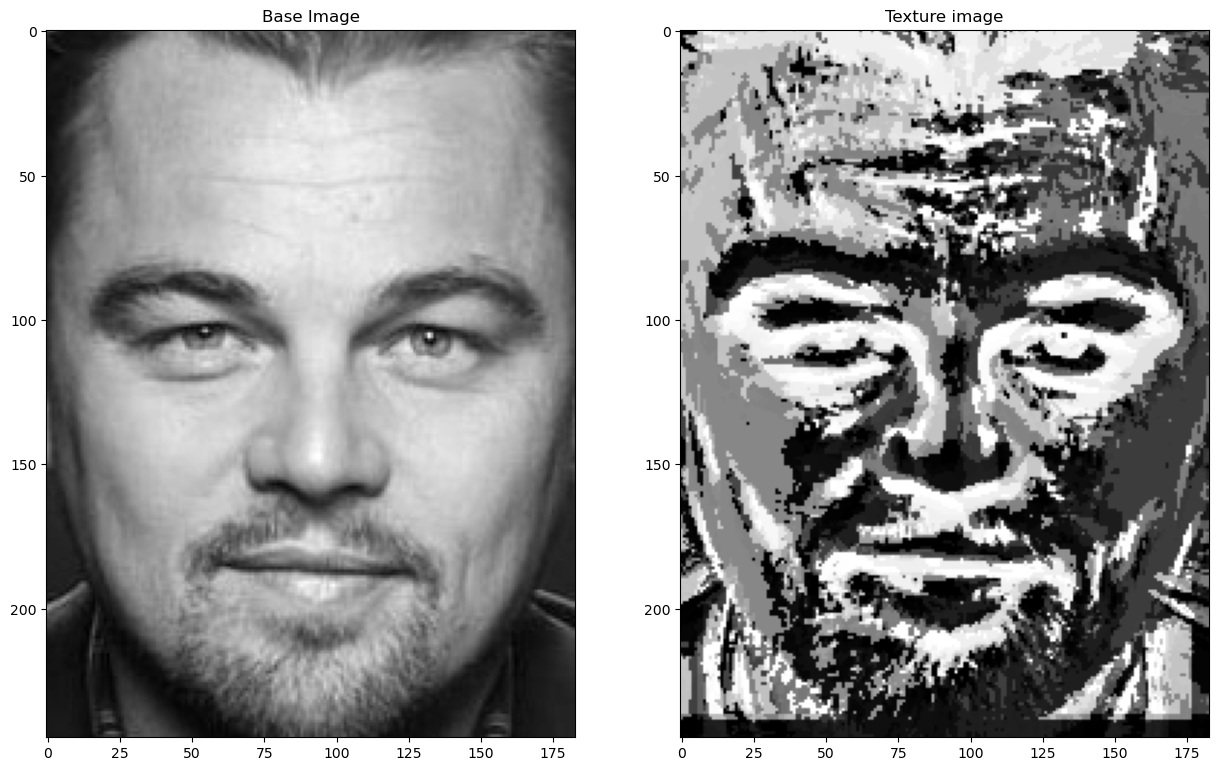

In [23]:
# we will use again skimage library for this algorithm

nPoints = 8
radius = 8
lbp = feature.local_binary_pattern(dicaprio1, nPoints, radius, method="default")

# Let's take a look at how our image looks
fig = plt.figure(figsize=(15, 12), dpi=100)
ax = fig.add_subplot(1, 2, 1)
plt.imshow(dicaprio1,cmap="gray")
ax.set_title('Base Image')
ax = fig.add_subplot(1,2,2)
plt.imshow(lbp,cmap="gray")
ax.set_title("Texture image")

# TO DO: change the parameters and analyze how they affect the output image

### With a larger circle radius features on a larger scales are detected and smaller details omited

Text(0.5, 1.0, 'Texture image')

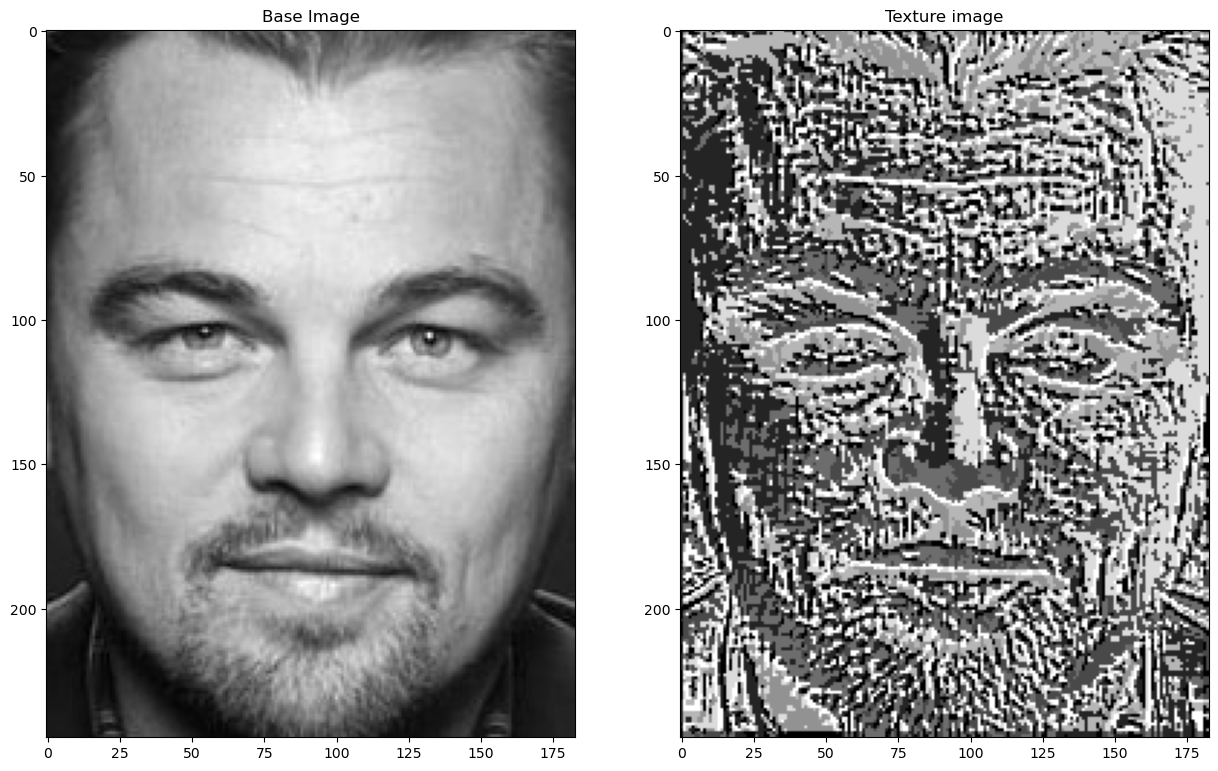

In [24]:
# we will use again skimage library for this algorithm

nPoints = 3
radius = 2
lbp = feature.local_binary_pattern(dicaprio1, nPoints, radius, method="default")

# Let's take a look at how our image looks
fig = plt.figure(figsize=(15, 12), dpi=100)
ax = fig.add_subplot(1, 2, 1)
plt.imshow(dicaprio1,cmap="gray")
ax.set_title('Base Image')
ax = fig.add_subplot(1,2,2)
plt.imshow(lbp,cmap="gray")
ax.set_title("Texture image")

# TO DO: change the parameters and analyze how they affect the output image

### With less neighbouring points analysed its harder to detect edges and corners


In [25]:
nPoints = 24
radius = 2
lbp_FA1 = feature.local_binary_pattern(faceA1, nPoints, radius, method="default")
lbp_FA2 = feature.local_binary_pattern(faceA2, nPoints, radius, method="default")
lbp_FB1 = feature.local_binary_pattern(faceB1, nPoints, radius, method="default")

distA_I = np.sqrt(np.sum((faceA1-faceA2)**2))
distB_I = np.sqrt(np.sum((faceA1-faceB1)**2))
print("pixel-wise distance between same person: {} ".format(distA_I))
print("pixel-wise distance between different persons: {} ".format(distB_I))

distA_LBP = np.sqrt(np.sum((lbp_FA1-lbp_FA2)**2))
distB_LBP = np.sqrt(np.sum((lbp_FA1-lbp_FB1)**2))
print("LBP pixel-wise distance between same person: {} ".format(distA_LBP))
print("LBP pixel-wise distance between different persons: {} ".format(distB_LBP))

pixel-wise distance between same person: 1065.824563424957 
pixel-wise distance between different persons: 1031.6016673115646 
LBP pixel-wise distance between same person: 731722519.3710771 
LBP pixel-wise distance between different persons: 919589024.1143999 


In [26]:
# we create a histogram of the lbp values
bin_size = 2049
lbph_A1,_ = np.histogram(lbp_FA1, bins = np.arange(0,bin_size), density=True)
# Let's take a look at the feature vector
print(lbph_A1)

[0.22106632 0.01950585 0.         ... 0.         0.04161248 0.15214564]


In [27]:
# Now let's compare our images' feature vectors with euclidean distance
lbph_FA1,_ = np.histogram(lbp_FA1, bins = np.arange(0,bin_size), density=True)
lbph_FA2,_ = np.histogram(lbp_FA2, bins = np.arange(0,bin_size), density=True)
lbph_FB1,_ = np.histogram(lbp_FB1, bins = np.arange(0,bin_size), density=True)

distA_LBP = np.sqrt(np.sum((lbp_FA1-lbp_FA2)**2))
distB_LBP = np.sqrt(np.sum((lbp_FA1-lbp_FB1)**2))
print("pixel-wise distance between same person: {} ".format(distA_LBP))
print("pixel-wise distance between different persons: {} ".format(distB_LBP))

distA_LBPH = np.sqrt(np.sum((lbph_FA1-lbph_FA2)**2))
distB_LBPH = np.sqrt(np.sum((lbph_FA1-lbph_FB1)**2))
print("LBPH pixel-wise distance between same person: {} ".format(distA_LBPH))
print("LBPH pixel-wise distance between different persons: {} ".format(distB_LBPH))

print("The distance between different persons is {} times the distance between same person for LBP".format(distB_LBP/distA_LBP))
print("The distance between different persons is {} times the distance between same person for LBPH".format(distB_LBPH/distA_LBPH))

pixel-wise distance between same person: 731722519.3710771 
pixel-wise distance between different persons: 919589024.1143999 
LBPH pixel-wise distance between same person: 0.09171556276422146 
LBPH pixel-wise distance between different persons: 0.14293579825809807 
The distance between different persons is 1.2567455555485652 times the distance between same person for LBP
The distance between different persons is 1.5584683117035596 times the distance between same person for LBPH


## Homework


Repeat the SIFT exercise but change the keypoint detection strategies and the descriptor. USE BRISK for keypoint detection and ORB as the descriptor.

Show keypoints detected and matches for all the images (dicaprio1, dicaprio2, and brad)

Compute the same metrics as before in the sift exercise: number of keypoints detected, number of matches in each comparison, and the ratio of matches over the minimum number of keypoints detected from both images (if image A has 3 keypoints and image B has 10 keypoints and there is only 1 successful match, the ratio would be 1/3).

You can see a tutorial on ORB in opencv here. You can create a BRISK object in the same way as with ORB. by doing cv2.BRISK_create()

You can combine different keypoint and descriptors to your like. (although OpenCV has some issues with some of these combinations)

According to the calculated metrics, which performs best, SIFT or BRISK/ORB?

Apply now LBPH to the dicaprio and brad pictures and compare the euclidean distance between dicaprio1 and dicaprio2 and between dicaprio1 and brad. Would the algorithm correctly recognize the person?



### Finding keypoints


In [37]:

# Initiate BRISK descriptor
BRISK = cv2.BRISK_create()

# print the number of keypoints in dicaprio1

kBRISK_d1 = BRISK.detect(dicaprio1,None)

# print the number of keypoints in dicaprio2
kBRISK_d2 = BRISK.detect(dicaprio2,None)

# print the number of keypoints in brad
kBRISK_b = BRISK.detect(brad,None)

# Initiate ORB detector
orb = cv2.ORB_create()

# compute the descriptors with ORB
kBRISK_d1, dORB_d1 = orb.compute(dicaprio1, kBRISK_d1)
kBRISK_d2, dORB_d2 = orb.compute(dicaprio2, kBRISK_d2)
kBRISK_b, dORB_b = orb.compute(brad, kBRISK_b)

print("BRISK found {} keypoints in dicaprio1, {} keypoints in dicaprio2 and {} keypoints in brad".format(len(kBRISK_d1),len(kBRISK_d2),len(kBRISK_b)))


BRISK found 91 keypoints in dicaprio1, 175 keypoints in dicaprio2 and 135 keypoints in brad


### Matches Dicaprio1, Dicaprio 2 with ORB and BRISK

The number of matches between dicaprios is 175 matches
The number of valid matches between the two photos is 12 matches
The ratio of matches between dicaprios over the MINIMUM number of keypoints detected between both images is 0.13186813186813187


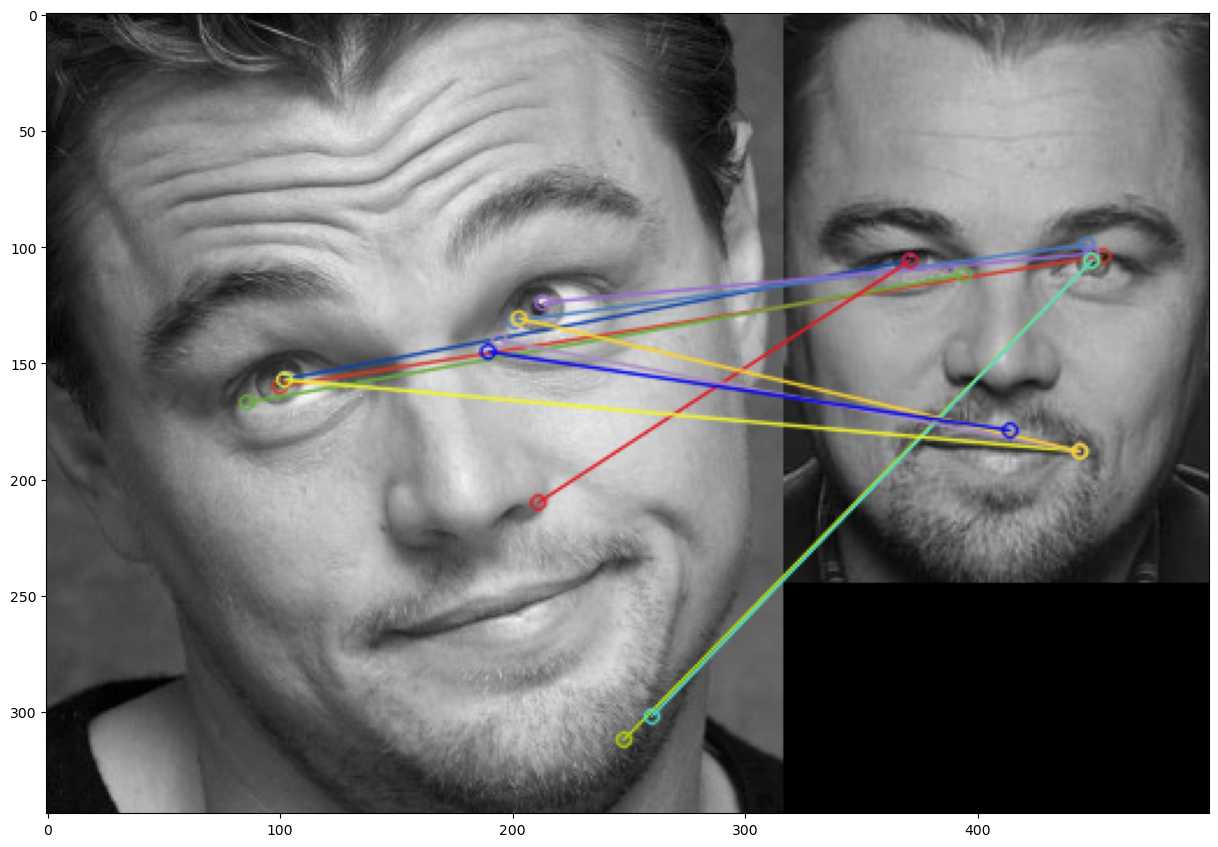

In [34]:
BFM = cv2.BFMatcher()

dicaprios_matches = BFM.knnMatch(dORB_d2,dORB_d1,k=2)

# print the number of matches between dicaprio vs dicaprio
print("The number of matches between dicaprios is {} matches".format(len(dicaprios_matches)))


valid_dicaprio_matches = []

for ImageA,ImageB in dicaprios_matches:
    if ImageA.distance < 0.8*ImageB.distance:
        valid_dicaprio_matches.append(ImageA)  

# print the number of valid matches for dicaprio vs dicaprio
print("The number of valid matches between the two photos is {} matches".format(len(valid_dicaprio_matches)))

ratio_dicaprios = len(valid_dicaprio_matches)/(min(len(kBRISK_d1),len(kBRISK_d2)))

# print the ratio of matches between dicaprios over the MINIMUM number of keypoints detected between both images
print("The ratio of matches between dicaprios over the MINIMUM number of keypoints detected between both images is {}".format(ratio_dicaprios))

dicaprio_match = cv2.drawMatches(dicaprio2,kpd2,dicaprio1,kpd1,valid_dicaprio_matches,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

fig = plt.figure(figsize=(15, 12), dpi=100)
plt.imshow(dicaprio_match)

### Matches Dicaprio1, Brat with ORB and BRISK

The number of matches between the dicaprio2 and brat is 175 matches
The number of valid matches between dicaprio2 and brat is 2 matches
The ratio of matches between dicaprio and brat over the MINIMUM number of keypoints detected between both images is 0.014814814814814815


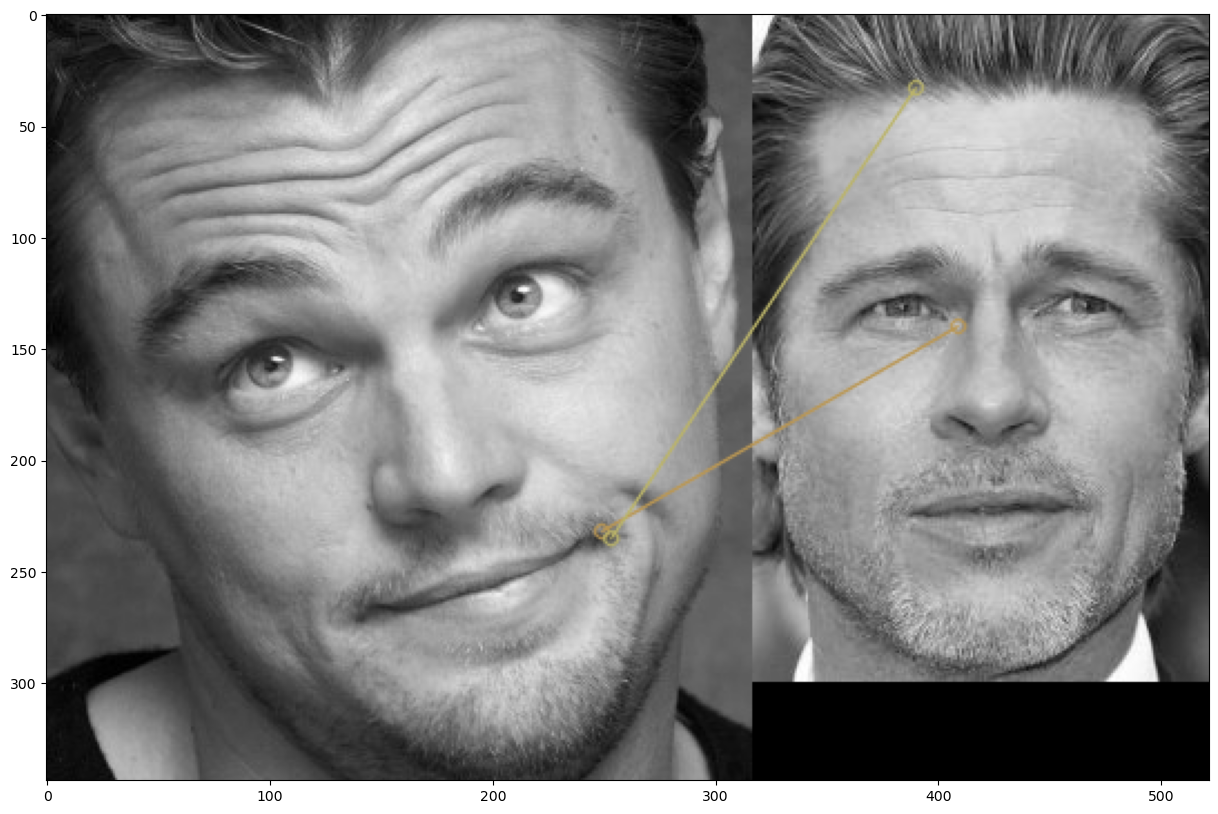

In [35]:
brat_matches = BFM.knnMatch(dORB_d2,dORB_b,k=2)

# print the number of matches between dicaprio vs dicaprio
print("The number of matches between the dicaprio2 and brat is {} matches".format(len(brat_matches)))


valid_brat_matches = []

for ImageA,ImageB in brat_matches:
    if ImageA.distance < 0.8*ImageB.distance:
        valid_brat_matches.append(ImageA)  

# print the number of valid matches for dicaprio vs dicaprio
print("The number of valid matches between dicaprio2 and brat is {} matches".format(len(valid_brat_matches)))

ratio_brat_dicaprio = len(valid_brat_matches)/(min(len(kBRISK_b),len(kBRISK_d2)))

# print the ratio of matches between dicaprios over the MINIMUM number of keypoints detected between both images
print("The ratio of matches between dicaprio and brat over the MINIMUM number of keypoints detected between both images is {}".format(ratio_brat_dicaprio))

dicaprio_brat_match = cv2.drawMatches(dicaprio2,kpd2,brad,kpbrad,valid_brat_matches,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

fig = plt.figure(figsize=(15, 12), dpi=100)
plt.imshow(dicaprio_brat_match)

According to the calculated metrics, which performs best, SIFT or BRISK/ORB?

Apply now LBPH to the dicaprio and brad pictures and compare the euclidean distance between dicaprio1 and dicaprio2 and between dicaprio1 and brad. Would the algorithm correctly recognize the person?